In [ ]:
#pip install beautifulsoup4
#pip install lxml
#pip install urllib2

In [24]:
from urllib.request import Request, urlopen
import re

import json
import csv
from time import sleep
import os

import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

In [4]:
try: 
    from BeautifulSoup import BeautifulSoup
except ImportError:
    from bs4 import BeautifulSoup

In [29]:
os.makedirs('olymplom') #создаем папку
os.makedirs("olymplom\zakl") #создаем папку отдельно для отборочного
os.makedirs("olymplom\otbor") #создаем папку отдельно для заключительного

In [7]:
def get_lom_data_otbor(u):
    
    session = requests.Session()
    retry = Retry(connect=3, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    
    
    headers = {
    "Accept": "*/*",
    "User-Agent": "Mozilla/5.0 (iPad; CPU OS 11_0 like Mac OS X) AppleWebKit/604.1.34 (KHTML, like Gecko) Version/11.0 Mobile/15A5341f Safari/604.1"
} #обходим блок парсера со сторон сайта
    
    req = session.get(u, headers = headers)
    src = req.text
    soup = BeautifulSoup(src,'lxml')
    
    table_head = soup.find(class_="table").find("tr").find_all('th')
    name = table_head[0].text
    point = table_head[1].text
    status = table_head[2].text
    
    lom_data = soup.find(class_="table").find('tbody').find_all('tr')
    return name, point, status, lom_data #парсим номер заявки участника, его итоговый балл и статус

def get_lom_data_zakl(u):
    session = requests.Session()
    retry = Retry(connect=3, backoff_factor=0.5)
    adapter = HTTPAdapter(max_retries=retry)
    session.mount('http://', adapter)
    session.mount('https://', adapter)
    
    
    headers = {
    "Accept": "*/*",
    "User-Agent": "Mozilla/5.0 (iPad; CPU OS 11_0 like Mac OS X) AppleWebKit/604.1.34 (KHTML, like Gecko) Version/11.0 Mobile/15A5341f Safari/604.1"
} #обходим блок парсера со стороны сайта
    
    req = session.get(u, headers = headers)
    src = req.text
    soup = BeautifulSoup(src,'lxml')
    
    table_head = soup.find(class_="table").find('tr').find_all('td')
    name = table_head[0].text
    point = table_head[1].text
    lom_data = soup.find(class_="table").find('tbody').find_all('tr')
    return name, point, lom_data #парсим имя участника, его итоговый балл и статус

def assign(item):
    product_tds = item.find_all('td')
    name1 = product_tds[0].text
    point1 = product_tds[1].text
    status1 = product_tds[2].text
    
    return product_tds, name1, point1, status1

def assignzakl(item):
    product_tds = item.find_all('td')
    name1 = product_tds[0].text
    point1 = product_tds[1].text
    
    return product_tds, name1, point1 #присвоение имени, балла и статуса каждому участнику (создаем объекты и присваиваем признаки)

In [5]:
dictionary = {
    'Биология': [1, 1],
    'Генетика': [2,2],
    'География': [3,3],
    'Геология': [4,4],
    'Журналистика': [5,5],
    'Инженерные науки': [6,6],
    'Английский язык': [7,7],
    'Немецкий язык': [8,8],
    'Французский язык': [9,9],
    'Информатика': [10,10],
    'История': [11,11],
    'История российской государственности': [12,12],
    'Космонавтика': [13,13],
    'Литература': [14,14],
    'Математика': [15,15],
    'Международные отношения и глобалистика': [16, -13],
    'Механика и математическое моделирование': [17, -12],
    'Обществознание': [18, -11],
    'Политология': [19, -10],
    'Право': [20, -9],
    'Предпринимательство': [21, -8],
    'Психология': [22, -7],
    'Религиоведение': [23, -6],
    'Робототехника': [24, -5],
    'Русский язык': [25, -4],
    'Физика': [26, -3],
    'Философия': [27, -2],
    'Химия': [28 ,-1],
    'Экология': [29, 0]
}
 #у каждого предмета свой номер страницы, создаем словарь, из которого будет вытягивать уникальный номер и создавать URL по нему

In [8]:
#Парсер
urlsotbor = []
urlszakl = []

subj = list(map(str, input('Какие предметы вам нужны? ').split(', ')))
subj = [i.title() for i in subj]
ind = [dictionary[i] for i in subj]
question = input('Какой этап олимпиады вам нужен? ')

if question.title() == 'Отборочный':
    for i in ind:
        urlsotbor.append(f'https://olymp.msu.ru/rus/event/{7700 + i[0]}/page/{3150 + i[1]}') #создаем URL по присвоению уникального номера
    for u in urlsotbor:
        name, point, status, lom_data = get_lom_data_otbor(u) #забираем данные по функции
        for name in subj:
            with open(f'olymplom/otbor/lom_otbor_{name}.csv', 'w', encoding = 'utf-8') as file:
                    writer = csv.writer(file)
                    writer.writerow((
                    name, 
                    point,
                    status)) #создаем таблицу со столбцами "имя, балл, статус"
            for item in lom_data:
                product_tds, name1, point1, status1 = assign(item)
                with open(f'olymplom/otbor/lom_otbor_{name}.csv', 'a', encoding = 'utf-8') as file:
                    writer = csv.writer(file)
                    writer.writerow((
                    name1, 
                    point1,
                    status1))

elif question.title() == 'Заключительный':
    for i in ind:
        urlszakl.append(f'https://olymp.msu.ru/rus/event/{7700 + i[0]}/page/{3281 + i[0]}') #создаем URL по присвоению уникального номера
    for u in urlszakl:
        name, point, lom_data = get_lom_data_zakl(u)
        for name in subj:
            with open(f'olymplom/zakl/lom_zakl_{name}.csv', 'w', encoding = 'utf-8') as file:
                    writer = csv.writer(file)
                    writer.writerow((
                    name, 
                    point))
    #                 status))
            for item in lom_data:
                product_tds, name1, point1 = assignzakl(item)
                with open(f'olymplom/zakl/lom_zakl_{name}.csv', 'a', encoding = 'utf-8') as file:
                    writer = csv.writer(file)
                    writer.writerow((
                    name1, 
                    point1))
    #                 status1)) #все аналогично

Какие предметы вам нужны? биология
Какой этап олимпиады вам нужен? отборочный


Теперь с помощью библиотеки pandas откроем наши csv-таблицы. Посмотрим на распределение баллов по данному предмету на отборочном и заключительном этапе. Далее мы объединим таблицы по номеру заявки и посмотрим, как взаимосвязан результат ученика на отборочном и заключительном этапе (если он на заключительный этап прошел, для этого используем merge)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
dfotbor = pd.read_csv('olymplom\otbor\lom_otbor_Биология.csv')

In [11]:
dfzakl = pd.read_csv('olymplom\zakl\lom_zakl_Биология.csv')

In [12]:
dfzakl = dfzakl.iloc[1:]
dfzakl['Балл'] = dfzakl['Балл'].astype(int)

In [13]:
result = pd.merge(dfotbor, dfzakl, on="Биология")
result.head()

,Биология,Балл_x,Статус,Балл_y
0,№ 1018488,81.223,Победитель,67
1,№ 1018743,82.223,Победитель,59
2,№ 1019409,82.223,Победитель,43
3,№ 1020194,81.023,Победитель,55
4,№ 1035121,83.297,Победитель,97


In [14]:
result["Балл_x"] = result["Балл_x"].apply(lambda x: int(x))
result["Балл_y"] = result["Балл_y"].apply(lambda x: int(x))
result.head()

,Биология,Балл_x,Статус,Балл_y
0,№ 1018488,81,Победитель,67
1,№ 1018743,82,Победитель,59
2,№ 1019409,82,Победитель,43
3,№ 1020194,81,Победитель,55
4,№ 1035121,83,Победитель,97


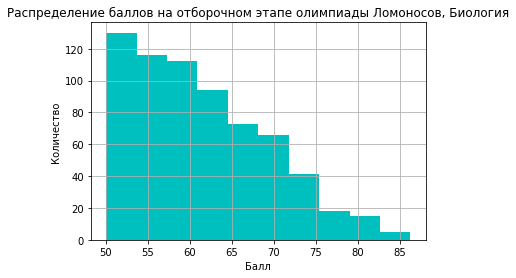

In [15]:
plt.hist(dfotbor['Балл'], color='c')
plt.title('Распределение баллов на отборочном этапе олимпиады Ломоносов, Биология')
plt.xlabel('Балл')
plt.ylabel('Количество')
plt.grid()
plt.show()

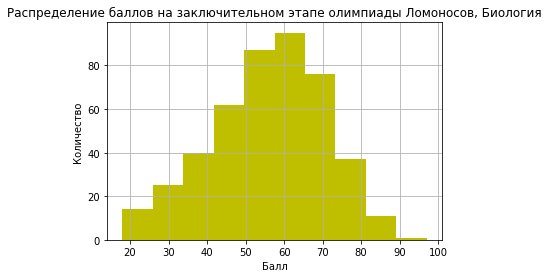

In [16]:
plt.hist(dfzakl['Балл'], color = 'y')
plt.title('Распределение баллов на заключительном этапе олимпиады Ломоносов, Биология')
plt.xlabel('Балл')
plt.ylabel('Количество')
plt.grid()
plt.show()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


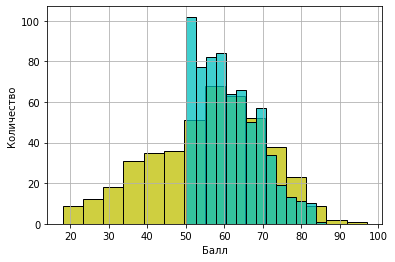

In [17]:
import seaborn as sns
sns.histplot(dfzakl['Балл'], color = 'y')
sns.histplot(dfotbor['Балл'], color = 'c')
plt.xlabel('Балл')
plt.ylabel('Количество')
plt.grid()
plt.show()

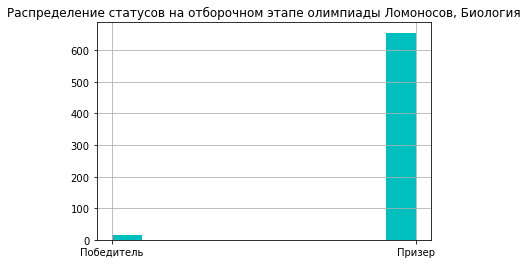

In [18]:
plt.hist(dfotbor['Статус'], color = 'c')
plt.title('Распределение статусов на отборочном этапе олимпиады Ломоносов, Биология')
plt.grid()
plt.show()

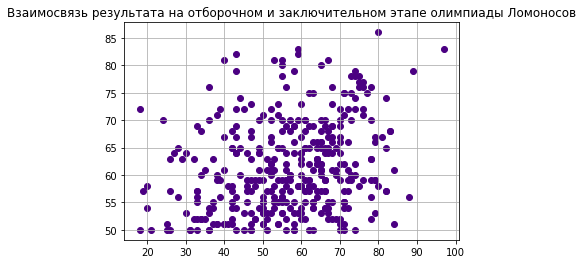

In [19]:
plt.scatter(result['Балл_y'], result['Балл_x'], color = 'indigo')
plt.title('Взаимосвязь результата на отборочном и заключительном этапе олимпиады Ломоносов')
plt.grid()
plt.show()

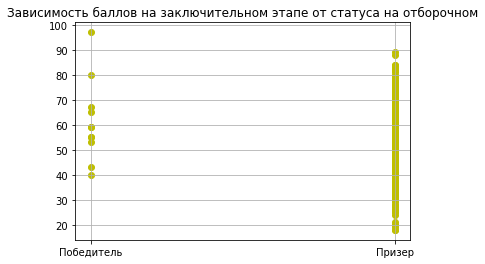

In [20]:
plt.scatter(x = result['Статус'], y = result['Балл_y'], color = 'y')
plt.title('Зависимость баллов на заключительном этапе от статуса на отборочном')
plt.grid()
plt.show()

In [21]:
print(f'Средний балл на отборочном этапе {result["Балл_x"].mean():.2f}, средний балл на заключительном этапе {result["Балл_y"].mean():.2f}')

Средний балл на отборочном этапе 61.47, средний балл на заключительном этапе 56.55
